In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from src.imagenet_x import get_factor_accuracies, error_ratio
from src.imagenet_x.utils import load_model_predictions, get_annotation_path
from src.imagenet_x import plots
from src.imagenet_x.evaluate import ImageNetX, get_vanilla_transform, ImageNetXImageFolder, load_annotations
import os
import pickle
from pathlib import Path

In [6]:
df1 = load_annotations(which_factor='multi')
samples = df1.sample(6)

In [103]:
samplescols = samples.columns[2:18]
k = samples.iloc[:, 2:18].values
samples_labels = []
l1 = []
for item in k:
    l1 = []
    for i, thing in enumerate(item):
        if thing == 1:
            l1.append(samplescols[i])
    samples_labels.append(l1)

samples['labels'] = samples_labels
samples

,index,file_name,class,multiple_objects,background,color,brighter,darker,style,larger,...,partial_view,pattern,pose,shape,subcategory,texture,justification,one_word,metaclass,labels
40293,42705,ILSVRC2012_val_00004566.JPEG,728,1,0,1,0,0,0,0,...,0,1,1,0,0,0,wine glass inside plastic bag,wine glass clear plastic bag,other,"[multiple_objects, color, pattern, pose]"
33327,35324,ILSVRC2012_val_00040524.JPEG,86,0,1,0,0,0,0,0,...,0,0,1,0,0,0,standing on a rock,standing,bird,"[background, pose]"
43752,46364,ILSVRC2012_val_00041474.JPEG,939,0,1,0,0,0,0,0,...,0,0,1,0,0,0,a close-up of a zucchini stem,close up stem,food,"[background, pose]"
35298,37402,ILSVRC2012_val_00033857.JPEG,725,0,1,1,0,0,0,0,...,0,1,1,0,0,0,image of transparent pitcher,transparent,vessel,"[background, color, pattern, pose]"
37181,39412,ILSVRC2012_val_00005917.JPEG,289,0,0,0,0,0,0,0,...,0,0,1,0,0,0,a snow leopard on top of the rock with its hea...,tree,other,[pose]
19797,21005,ILSVRC2012_val_00025250.JPEG,679,0,1,0,0,0,0,0,...,0,1,1,0,0,0,a necklace made of chains and beads on a black...,box,other,"[background, pattern, pose]"


In [9]:
root = "../data/ImageNetVal/"

In [15]:
l1 = {}
for path, subdirs, files in os.walk(root):
    for name in files:
        l1[name] = os.path.join(path, name)

In [17]:
samples['path'] = samples['file_name'].apply(lambda x: l1[x])

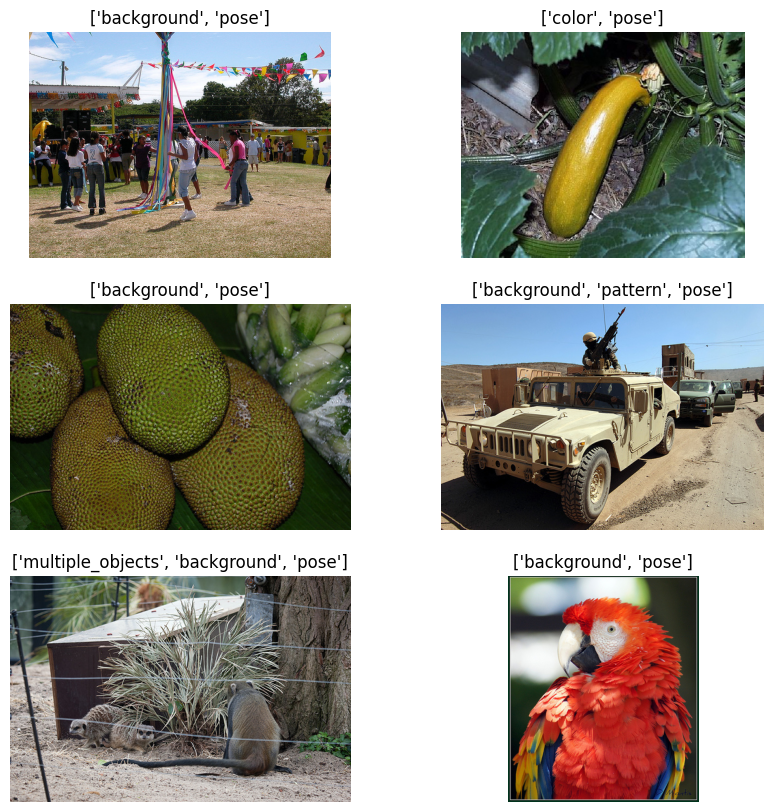

In [101]:
# plot 6 in a grid with matplotlib cropping them
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = plt.imread(samples.iloc[i]['path'])
    ax.imshow(img)
    ax.set_title(samples_labels[i])
    ax.axis('off')